#    NEWTON'S METHOD FOR SECOUND ORDER OPTIMIZATION
            


In [1]:
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd

The codding challege is implementation of newton's second order optimization
based on the koggle House Sales in King County, USA data.https://www.kaggle.com/harlfoxem/housesalesprediction.
for predicting house price based on the living area

In [2]:
#read the data from the kc_house_data and drop the columns which are not needed

dataFrame = pd.read_csv('kc_house_data.csv',nrows=1000)#read the CSV file only 1000 dataset

Cols = ['price','sqft_living'] #these are the the columns which are needed
dataFrame = dataFrame[Cols] #consider only those columns which are required and drop the other columns
dataFrame[['price']] = dataFrame[['price']]/1000

print(dataFrame.head())#print the data

print('no of dataset:',len(dataFrame))#no of dataset

#data_points = dataFrame.as_matrix() #conver the data to the matrix form

   price  sqft_living
0  221.9         1180
1  538.0         2570
2  180.0          770
3  604.0         1960
4  510.0         1680
no of dataset: 1000


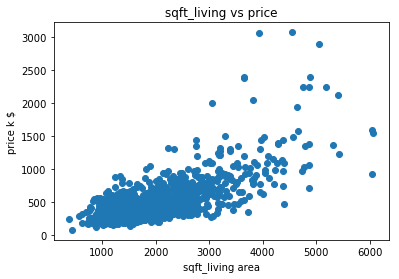

In [3]:
#simply plotting of data in 2d form
plt.scatter(dataFrame['sqft_living'],dataFrame['price'])
plt.title(' sqft_living vs price ')
plt.xlabel('sqft_living area')
plt.ylabel('price k $')
plt.show()

In [4]:
#b,m are the constant of equation  linear rgression y = m*x +b
init_consts = np.array([0,0])#inital parameter of best fit which is assign to b=0,m=0
criteria = 8000
epsi = 1e-5 #epsilon 

N = len(dataFrame.index)#length of dataset
total_living =  sum(dataFrame['sqft_living'])#sum of all sqft_living
sq_total_living = sum(np.power(dataFrame['sqft_living'],2))# sum of sqft_living^2

#Initialize hessian matrix
H = [[-N,-total_living],[-total_living,-sq_total_living]]

#update newton method to give new points
def newton_method_update(old_consts, H, J):
    new_consts = np.array(np.subtract(old_consts, np.dot(np.linalg.pinv(H),J)))
    
    return new_consts
    
price = np.array(dataFrame['price'])#conver to array
living_sqft = np.array(dataFrame['sqft_living'])#conver to array

new_consts = init_consts#initialie new parameter

#this condition for looping
while criteria > epsi:
    old_consts = new_consts
    
    J_position1 = np.nansum(price) - N * old_consts[0] - total_living * old_consts[1]
    J_position2 = np.nansum(price * living_sqft) - total_living * old_consts[0] - sq_total_living * old_consts[1]
    J = np.array([J_position1,J_position2])
    
    new_consts = newton_method_update(old_consts, H, J)
    
    criteria = np.linalg.norm(new_consts - old_consts)#criteria check every time for looping
    

In [5]:
#this is point obtains which of best fit
#were m = new_points[1] and b=new_points[0]
#
print(new_consts)

[-32.30465472   0.26946205]


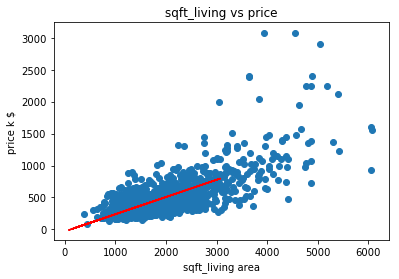

In [6]:
#plot the line of best fit
plt.plot(price, new_consts[1] * price + new_consts[0],'red')
#data with respect to sqft_living vs price
plt.scatter(dataFrame['sqft_living'],dataFrame['price'],)
plt.title(' sqft_living vs price ')
plt.xlabel('sqft_living area')
plt.ylabel('price k $')
plt.show()